In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import glob

from gwtess import Gwtess
%matplotlib inline


In [3]:


tesspath = '../data/tess-bandpass.csv'
spectrapath = glob.glob('../data/spectrum-at-*.csv')
spectime = [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]

nominalmerger = 1540
highmerger = 1540+3200
lowmerger = 1540-1220


GWT = Gwtess(tesspath, spectrapath, spectime, mergerrate=lowmerger)
eventAbsMag = GWT.get_obs_absmag()

apmags, detected = GWT.sim_events(years=100)

apmags_var, detected_var, is_onaxis = GWT.sim_events(fixedlum=False, years=100)



/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


(array([  0.,   1.,   3.,   8.,  43.]),
 array([13, 14, 15, 16, 17, 18]),
 <a list of 5 Patch objects>)

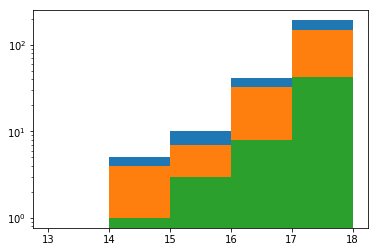

In [4]:
# plt.hist(apmags, alpha=0.2, bins=np.arange(13,19,1))
plt.hist(apmags_var, alpha=1.0, bins=np.arange(13,19,1), log=True)
plt.hist(apmags_var[~is_onaxis], alpha=1.0, bins=np.arange(13,19,1), log=True)
plt.hist(apmags_var[is_onaxis], alpha=1.0, bins=np.arange(13,19,1), log=True)


In [5]:
print('total detections for variable brightness = {:.2f}'.format(
    apmags_var[apmags_var < 18.4].shape[0] * 0.041 / 1))
print('total on-axis detections for variable brightness = {:.2f}'.format(
    apmags_var[(apmags_var < 18.4) & is_onaxis].shape[0] * 0.041 / 1))
print('total off-axis detections for variable brightness = {:.2f}'.format(
    apmags_var[(apmags_var < 18.4) & ~is_onaxis].shape[0] * 0.041 / 1))
print('total detections for fixed brightness = {:.2f}'.format(
    apmags[apmags < 18.4].shape[0] * 0.041 / 1))

total detections for variable brightness = 18.45
total on-axis detections for variable brightness = 4.18
total off-axis detections for variable brightness = 14.27
total detections for fixed brightness = 1.39


### for nominal density:
* total detections for variable brightness = 86.428
* total on-axis detections for variable brightness = 14.596
* total off-axis detections for variable brightness = 71.83200000000001
* total detections for fixed brightness = 8.856

### for high density
* total detections for variable brightness = 272.69100000000003
* total on-axis detections for variable brightness = 44.034
* total off-axis detections for variable brightness = 228.657
* total detections for fixed brightness = 24.928

### for low density
* total detections for variable brightness = 16.687
* total on-axis detections for variable brightness = 3.4850000000000003
* total off-axis detections for variable brightness = 13.202
* total detections for fixed brightness = 2.255

In [6]:
noff = GWT.distances[(apmags_var < 18.4) & ~is_onaxis].shape[0]
non = GWT.distances[(apmags_var < 18.4) & is_onaxis].shape[0]

a1 = np.sort(GWT.distances[(apmags_var < 18.4) & ~is_onaxis] / 1.E6)[int(np.round(noff*0.05, ))]
a2 = np.sort(GWT.distances[(apmags_var < 18.4) & ~is_onaxis] / 1.E6)[int(np.round(noff*0.95, ))]
print('off-axis distance range: {:.2f} - {:.2f}'.format(a1,a2))
       
a1 = np.sort(GWT.distances[(apmags_var < 18.4) & is_onaxis] / 1.E6)[int(np.round(non*0.05, ))]
a2 = np.sort(GWT.distances[(apmags_var < 18.4) & is_onaxis] / 1.E6)[int(np.round(non*0.95, ))]
print('on-axis distance range: {:.2f} - {:.2f}'.format(a1,a2))


print('{:.2f}% are with 200Mpc'.format(
    GWT.distances[(apmags_var < 18.4) & (GWT.distances < 200E6)].shape[0] /
      GWT.distances[(apmags_var < 18.4)].shape[0] * 100))

off-axis distance range: 52.52 - 226.18
on-axis distance range: 208.53 - 701.36
66.00% are with 200Mpc


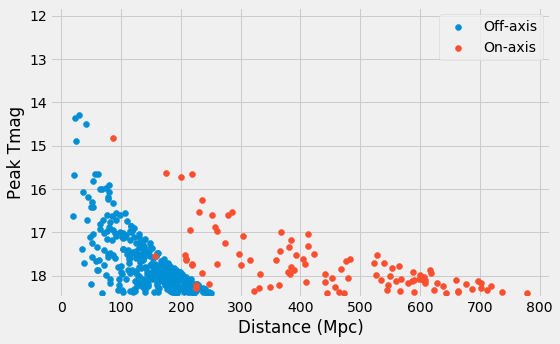

In [7]:
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])
    plt.scatter(GWT.distances[(apmags_var < 18.4) & ~is_onaxis] / 1.E6, 
                apmags_var[(apmags_var < 18.4) & ~is_onaxis], label='Off-axis')
    plt.scatter(GWT.distances[(apmags_var < 18.4) & is_onaxis] / 1.E6, 
                apmags_var[(apmags_var < 18.4) & is_onaxis], label='On-axis')
    plt.ylim(18.5,11.8)
#     plt.xlim(0,3.5)
    plt.ylabel('Peak Tmag')
    plt.xlabel('Distance (Mpc)')
    plt.legend()
    fig.tight_layout()
#     fig.savefig('events-per-decade.png')

In [8]:
print('observed mags:\n {:.2f}\n {:.2f}\n {:.2f}\n {:.2f}\n {:.2f}\n {:.2f}\n {:.2f}\n {:.2f}\n'.format(*GWT.get_apmag(eventAbsMag, 41E6)))

observed mags:
 17.33
 17.32
 17.57
 18.08
 18.46
 18.95
 20.27
 20.69



In [9]:
# we are only sensitive to ~60% of detections 
# 30% at 170 Mpc
# 30% at 190 Mpc
n = GWT.distances[(apmags_var < 18.4)].shape[0]
rand = np.random.sample(size=n)
observed = rand <= 0.6
dd = GWT.distances[(apmags_var < 18.4)] / 1.E6
ddearly = dd[observed & (rand <= 0.3)]
ddlate = dd[observed & (rand > 0.3)]

print('total EM+GW detection in 100 years = {}'.format(ddearly[ddearly < 170].shape[0] +
                                                       ddearly[ddearly < 190].shape[0]))
print('total EM+GW detection in 100 years in TESS fov = {}'.format(0.041*(ddearly[ddearly < 170].shape[0] +
                                                       ddearly[ddearly < 190].shape[0])))
# 786 * 0.041

total EM+GW detection in 100 years = 138
total EM+GW detection in 100 years in TESS fov = 5.658


### nominal
* total EM+GW detection in 100 years = 770
* total EM+GW detection in 100 years in TESS fov = 31.57

### high merger rate
* total EM+GW detection in 100 years = 2460
* total EM+GW detection in 100 years in TESS fov = 100.86

### low merger rate
* total EM+GW detection in 100 years = 154
* total EM+GW detection in 100 years in TESS fov = 6.314

In [123]:
t_sim = np.arange(0,10,1./48)
m_sim = GWT._f5(t_sim)
yerr_sim = GWT.get_yerr_mag(m_sim, )

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


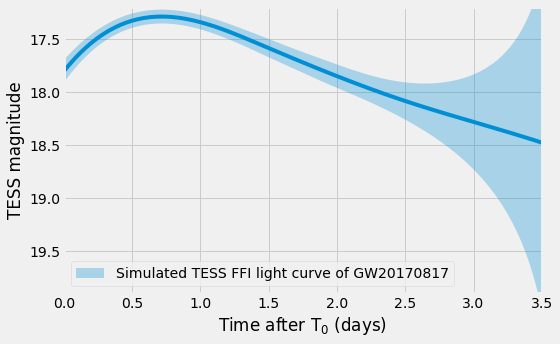

In [125]:
# yerr = np.log10(1-GWT.TESS_noise_1h(mag))/-0.4
f5 = interp1d(GWT.time, mag, kind='cubic',
                          bounds_error=False, fill_value='extrapolate')

t_sim = np.arange(0,10,1./48)
m_sim = f5(t_sim)

# yerr = np.log10((1.0 - (GWT.TESS_noise_1h(mag)/1.E6 / np.sqrt(0.5)))) / -0.4
# plt.errorbar(GWT.time, mag, yerr = yerr, fmt='.' )

yerr_sim = np.log10((1.0 - (GWT.TESS_noise_1h(m_sim)/1.E6 / np.sqrt(0.5)))) / -0.4
# plt.errorbar(t_sim, m_sim, yerr = yerr_sim, fmt='.' )

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])
    plt.plot(t_sim, m_sim, )
    plt.fill_between(t_sim, m_sim-yerr_sim, m_sim+yerr_sim, alpha=0.3,
                     label = 'Simulated TESS FFI light curve of GW20170817')

    plt.ylim(19.9,17.2)
    plt.xlim(0,3.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('TESS magnitude')
    plt.legend()
    fig.tight_layout()
    fig.savefig('tess-lc-gw20170817.png')

In [134]:
erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))

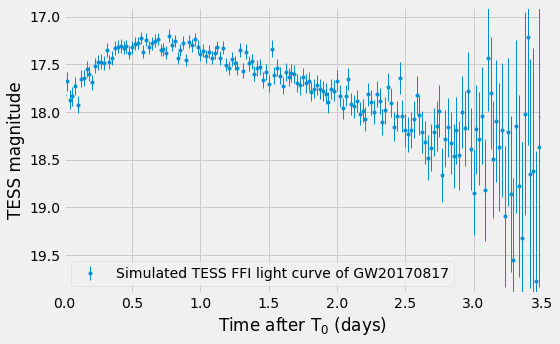

In [138]:
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])


    plt.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
             yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=1,
                 label = 'Simulated TESS FFI light curve of GW20170817')
#     plt.plot(t_sim[np.isfinite(yerr_sim)], m_sim[np.isfinite(yerr_sim)], lw=1)
    plt.ylim(19.9,16.9)
    plt.xlim(0,3.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('TESS magnitude')
    plt.legend(loc=3)
    fig.tight_layout()
#     fig.savefig('tess-lc-gw20170817-v2.png')

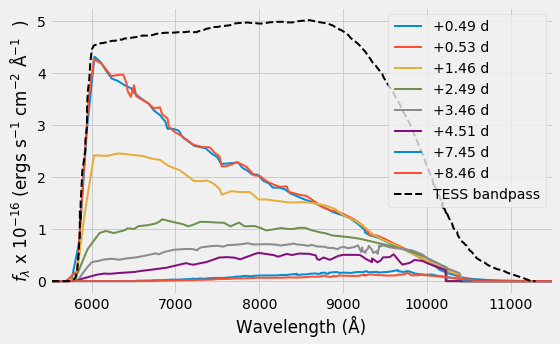

In [102]:
t = [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])

    for i, s in enumerate(GWT.spectra_l):
        plt.plot(GWT.wavelength_ang, s/1E-16,
                     label ='+{} d'.format(t[i] ), lw=2)
#     plt.ylim(19.9,16.9)
    plt.xlim(5500,11500)
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('$f_\lambda$ x $10^{-16}$ (ergs s$^{-1}$ cm$^{-2}$ Å$^{-1}$  )')
    plt.plot(GWT.tess_ang, GWT.tess_qe*5, color='k', ls='--', lw=2, label='TESS bandpass')
    plt.legend(loc=0)
    fig.tight_layout()
    fig.savefig('tess-convolved-spectra-gw20170817.png')
#


In [16]:
print('maxtime = {}'.format(t_sim[np.argmin(m_sim)]))

maxtime = 0.7083333333333333


In [20]:
GWT.get_absmag(np.min(m_sim), 41E6)

-15.774105979623808

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


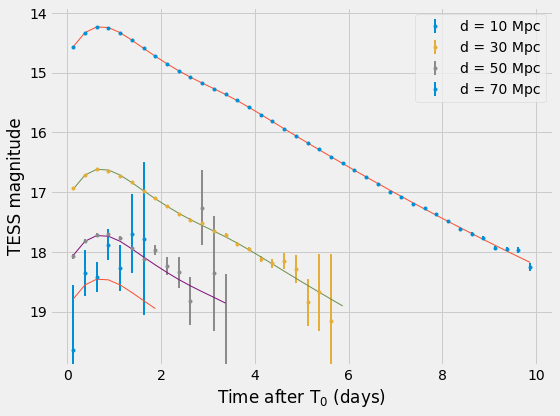

In [5]:

t_sim = np.arange(1./8,10,1./4)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,6])
    
    for d in [10E6, 30E6,  50E6, 70E6]:
        mag1 = GWT.get_apmag(eventAbsMag, d)
        f5 = interp1d(GWT.time, mag1, kind='cubic',
                          bounds_error=False, fill_value='extrapolate')
        m_sim = f5(t_sim)
        yerr_sim =  np.log10((1.0 - (GWT.TESS_noise_1h(m_sim)/1.E6 / np.sqrt(6)))) / -0.4
        erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))
        plt.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
                 yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=2,
                     label = 'd = {0:.0f} Mpc'.format(d/1E6))
        plt.plot(t_sim[np.isfinite(yerr_sim)], m_sim[np.isfinite(yerr_sim)], lw=1)
    plt.ylim(19.9,13.9)
#     plt.xlim(0,3.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('TESS magnitude')
    plt.legend(loc=0)
    fig.tight_layout()
#     fig.savefig('tess-lc-various-distances.png')


###### 

In [79]:
distances

array([  5.28712806e+08,   6.41749498e+08,   7.45314646e+08, ...,
         5.15648299e+08,   3.68419129e+08,   5.32137187e+08])

In [50]:
615 - 183

432

In [51]:
183 - 35

148

In [55]:
20 * np.tan(np.radians(58.5))

32.637033742575788

In [61]:
q = (20 / np.sin(np.radians(63))) * 12

In [62]:
 (20*360) - (2*q)

6661.2834059355064

In [63]:
6661.2834059355064 / 41253

0.16147391476827155

In [104]:
(183)*0.041, (615)*0.041, (35)*0.041

(7.503, 25.215, 1.435)

In [105]:
25.215 - 7.503

17.712

In [106]:
np.random.sample()

6.068

In [20]:
print((2 * np.pi*(1-np.cos(np.radians(7))) * 2) / (4*np.pi) )
print((2 * np.pi*(1-np.cos(np.radians(16))) * 2) / (4*np.pi) )

0.00745384835868
0.0387383040617


In [19]:
vals = np.random.normal(16,10,size=10000)
np.percentile((2 * np.pi*(1-np.cos(np.radians(vals[vals>0]))) * 2) / (4*np.pi), [50])
np.mean((2 * np.pi*(1-np.cos(np.radians(vals[vals>0]))) * 2) / (4*np.pi))

0.056034130181992929

In [33]:
# np.logspace(-0.3,2,10)
np.log(0.3), np.log(13), np.log(3), np.log(130)

(-1.2039728043259361,
 2.5649493574615367,
 1.0986122886681098,
 4.8675344504555822)

In [25]:
low = -0.7
high = 2.3
size=10000
q = np.exp(np.random.uniform(low, high, size))
print(q)

[ 9.19604768  0.786111    3.99735771 ...,  0.5792133   7.23584172
  0.78257704]


(array([ 3572.,  1674.,  1123.,   782.,   699.,   544.,   493.,   384.,
          368.,   361.]),
 array([ 0.4970132 ,  1.44448492,  2.39195665,  3.33942837,  4.28690009,
         5.23437182,  6.18184354,  7.12931526,  8.07678699,  9.02425871,
         9.97173043]),
 <a list of 10 Patch objects>)

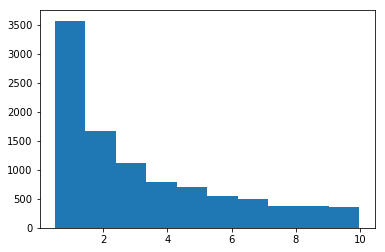

In [29]:
m1 = - 2.5 * np.log10(q)
plt.hist(q)

In [30]:
np.median(q)

2.2324823412305701

In [228]:
from scipy.special import gammainc
def sim_stars(n_per_sphere):
    # draw from a sphere
    # we want the volume to be 1 Gpc, so
    center=[0,0,0]
    r = (1. / ((4/3) * np.pi))**(1/3)
    ndim = 3
    x = np.random.normal(size=(n_per_sphere, 3))
    ssq = np.sum(x**2,axis=1)
    fr = r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

(-0.6813245506943103,
 0.68156049104048588,
 -0.68275910948231744,
 0.68273995582486324)

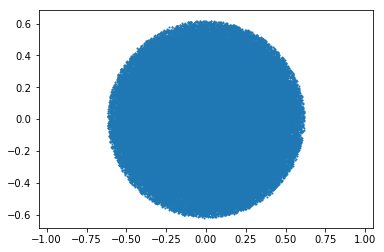

In [239]:
x, y, z = sim_stars(100000).T
fig = plt.figure()
plt.scatter(x,z,s=1)
plt.axis('equal')

In [246]:
p = sim_stars(100000).T

(array([   135.,    756.,   2106.,   3770.,   6252.,   9217.,  12673.,
         16816.,  21718.,  26557.]),
 array([ 0.00789923,  0.06914434,  0.13038945,  0.19163456,  0.25287967,
         0.31412478,  0.37536989,  0.436615  ,  0.49786011,  0.55910522,
         0.62035033]),
 <a list of 10 Patch objects>)

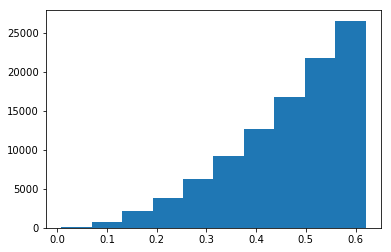

In [249]:
plt.hist(np.sqrt(p[0]**2 + p[1]**2 + p[2]**2))

(array([ 3562.,  1710.,  1153.,   822.,   633.,   561.,   500.,   400.,
          343.,   316.]),
 array([ 0.49665131,  1.44432448,  2.39199765,  3.33967083,  4.287344  ,
         5.23501717,  6.18269034,  7.13036351,  8.07803668,  9.02570985,
         9.97338302]),
 <a list of 10 Patch objects>)

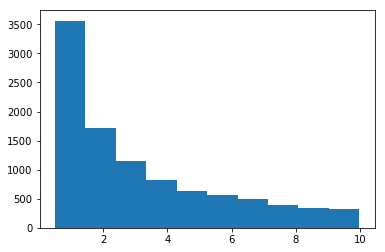

In [38]:
low = -0.7
high = 2.3
size=10000
q = np.exp(np.random.uniform(low, high, size))
plt.hist(q)

(array([ 2053.,  1392.,  1141.,   973.,   853.,   780.,   734.,   758.,
          689.,   627.]),
 array([ 0.50042683,  1.45014899,  2.39987115,  3.34959331,  4.29931547,
         5.24903763,  6.19875979,  7.14848195,  8.0982041 ,  9.04792626,
         9.99764842]),
 <a list of 10 Patch objects>)

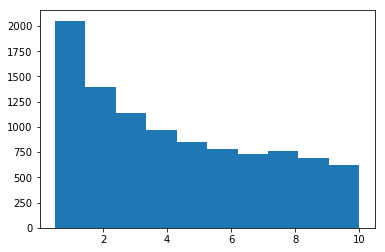

In [42]:
q1 = (np.random.uniform(0.5**0.5, 10**0.5, size))**2
plt.hist(q1)

In [ ]:
np.random.uniform